<a href="https://colab.research.google.com/github/vladislavlisin/Stylometry_Extra/blob/main/Stylometry_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# работаем в google colab
# подключаем гугл диск с данными
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Работа над проектом уже закончена, результаты оформлены в текстовом формате

# **Смотрим на данные**

In [ ]:
import pandas as pd 
import numpy as np

corpus = pd.read_csv("/content/drive/MyDrive/poems_ok.csv", delimiter=',', encoding='utf-8')

corpus

,index,author,name,year,text
0,0,Пушкин,NaN,0,"Когда сожмешь ты снова руку,\nКоторая тебе дар..."
1,1,Пушкин,NaN,0,"Тебя ль я видел, милый друг?\nИли неверное то ..."
2,2,Пушкин,NaN,0,"Когда, к мечтательному миру\nСтремясь возвышен..."
3,3,Пушкин,NaN,0,Его стихов пленительная сладость\nПройдет веко...
4,4,Пушкин,NaN,0,"Бессмертною рукой раздавленный зоил,\nПозорног..."
...,...,...,...,...,...
1026,1027,Дельвиг,66,1819,"Друзья, поверьте, не грешно\nЛюбить с вином бо..."
1027,1028,Дельвиг,А. С. ПУШКИНУ (Из Малороссии),1817,"А я ужель забыт тобою,\nМой брат по музе, мой ..."
1028,1029,Дельвиг,К ДОРИДЕ,1815,"Дорида, Дорида! любовью все дышит,\nВсе пьет н..."
1029,1030,Дельвиг,РОМАНС,1823,Вчера вакхических друзей\nЯ посетил кружок вес...


In [ ]:
corpus['text'][0]

'Когда сожмешь ты снова руку,\nКоторая тебе дарит\nНа скучный путь и на разлуку\nСвятую Библию Харит?\nАмур нашел ее в Цитере,\nВ архиве Шалости младой.\nПо ней молись своей Венере\nБлагочестивою душой.\nПрости, эпикуреец мой!\nОстанься век, каков ты ныне,\nЛети во мрачный Альбион!\nДа сохранят тебя в чужбине\nХристос и верный Купидон!\nНеси в чужой предел Пената,\nНо, помня прежни дни свои,\nЛюби недевственного брата,\nСтрадальца чувственной любви!'

In [ ]:
# посмотрим на данные в целом, какая длина?

# словарь (индекс: кол-во строк)
lengths = {j: i.count("\n") for i, j in zip(corpus['text'], corpus["index"])}

print("Самая маленькая поэма строк и её индекс")
print(min(lengths.values()) + 1)
print(min(lengths, key=lengths.get))

print("Самая большая поэма строк и её индекс")
print(max(lengths.values()) + 1)
print(max(lengths, key=lengths.get))

Самая маленькая поэма строк и её индекс
1
314
Самая большая поэма строк и её индекс
384
326


<Axes: >

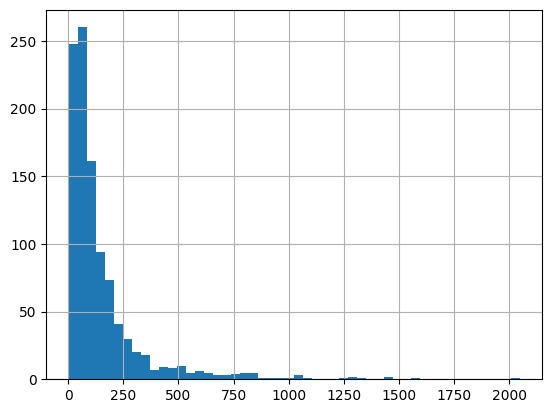

In [ ]:
# количество слов - количество поэм
seq_len = [len(str(i).split()) for i in corpus['text']]
pd.Series(seq_len).hist(bins = 50)

<Axes: >

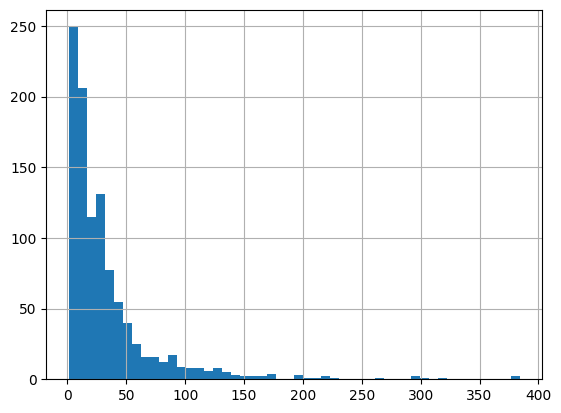

In [ ]:
# количество строк - количество поэм
seq_len = [len(str(i).split("\n")) for i in corpus['text']]
pd.Series(seq_len).hist(bins = 50)

In [ ]:

corpus.loc[corpus['index'] == 314]
# и что это такое, данные грязные

,index,author,name,year,text
314,314,Пушкин,NaN,0,(ПОДРАЖАНИЕ ФРАНЦУЗСКОМУ).


In [ ]:
# стихи, где меньше 4 строк, найдём индексы этих строк
keys_ = [key for key, val in lengths.items() if val < 3]
len(keys_)

13

In [ ]:
# посмотрим сколько реально больших стихотворений
keys_1000 = [key for key, val in lengths.items() if val > 195]
len(keys_1000)

12

In [ ]:
# маленькие стихотворения 
for i in keys_:
    stroka = ((corpus.loc[corpus['index'] == i]).text.values)[0]
    print(stroka)
    print()

Аптеку позабудь ты для венков лавровых
И не мори больных, но усыпляй здоровых.

Как беспокоюсь я! три ночи,
Поверьте, глаз я не смыкал». —
«Да, слышал, слышал: в банк играл.»

Он песни пишет зло,
Как Геркулес, сатиры пишет,
Влюблен, как Буало.

(ПОДРАЖАНИЕ ФРАНЦУЗСКОМУ).

Прельщать поэзией я дара не имею
Других бы мог хвалить, тебя хвалить  не смею!

Сей камень над моей возлюбленной женой!
Ей там, мне здесь покой!

Испытанных друзей для новых забывать
Есть  цвет плоду предпочитать!

Лягушке вздумалось: сем сделаюсь с быка,
Хотя и лопну я  да мысль-то велика!

Мы не смерти боимся, но с телом расстаться нам жалко:
Так не с охотою мы старый сменяем халат.

И вещего бояна опустили
Сквозь запах роз и песни соловьев
Под тень олив, на ложе из цветов.

Жизнью земною играла она, как младенец игрушкой.
Скоро разбила ее: верно, утешилась там.

Сладкие слезы первой любви, как роса, вы иссохли!
 Нет! на бессмертных цветах в светлом раю мы блестим!

Ты переводчик, я читатель,
Ты усыпитель  я зевател

In [ ]:
# удалим все поэмы длина которых меньше 4 строк - хороший готовый сэт
corpus_more_4 = corpus.copy()
corpus_more_4 = corpus_more_4.drop(keys_, axis=0).drop(["index"], axis=1).reset_index(drop=True)
corpus_more_4

,author,name,year,text
0,Пушкин,NaN,0,"Когда сожмешь ты снова руку,\nКоторая тебе дар..."
1,Пушкин,NaN,0,"Тебя ль я видел, милый друг?\nИли неверное то ..."
2,Пушкин,NaN,0,"Когда, к мечтательному миру\nСтремясь возвышен..."
3,Пушкин,NaN,0,Его стихов пленительная сладость\nПройдет веко...
4,Пушкин,NaN,0,"Бессмертною рукой раздавленный зоил,\nПозорног..."
...,...,...,...,...
1013,Дельвиг,66,1819,"Друзья, поверьте, не грешно\nЛюбить с вином бо..."
1014,Дельвиг,А. С. ПУШКИНУ (Из Малороссии),1817,"А я ужель забыт тобою,\nМой брат по музе, мой ..."
1015,Дельвиг,К ДОРИДЕ,1815,"Дорида, Дорида! любовью все дышит,\nВсе пьет н..."
1016,Дельвиг,РОМАНС,1823,Вчера вакхических друзей\nЯ посетил кружок вес...


In [ ]:
# Определим функцию, чтобы вытащить общие сведения из данных
def get_info(data):
    info = pd.DataFrame(data=data.isnull().sum(), columns=["NaNs number"], index=data.columns)
    info["dtype"] = data.dtypes
    info['uniq el'] = [len(pd.unique(data.iloc[:,k])) for k in range(0, len(data.columns))]
    print("Сколько поэм Пушкина и их процент от общей массы: ")
    print("Уникальные метки")
    print(corpus.author.unique())
    print(data["author"].value_counts())
    print(data["author"].value_counts()/len(data["author"]))
    print(data["author"].value_counts().values[1:].sum()/len(data["author"]))
    print(info)

In [ ]:
get_info(corpus)

Сколько поэм Пушкина и их процент от общей массы: 
Уникальные метки
['Пушкин' 'Батюшков' 'Боратынский' 'Жуковский' 'Дельвиг']
Пушкин         323
Жуковский      210
Дельвиг        199
Боратынский    197
Батюшков       102
Name: author, dtype: int64
Пушкин         0.313288
Жуковский      0.203686
Дельвиг        0.193016
Боратынский    0.191077
Батюшков       0.098933
Name: author, dtype: float64
0.6867119301648884
        NaNs number   dtype  uniq el
index             0   int64     1031
author            0  object        5
name            323  object      629
year              0   int64       49
text              0  object     1031


In [ ]:
# Не будем изменять исходный dataframe
# разделим X и y
df = corpus_more_4.copy(deep=True)

from sklearn.preprocessing import LabelEncoder 

labels_map = {'Пушкин': 1, 'Батюшков': 0, 'Боратынский': 0, 'Жуковский': 0, 'Дельвиг': 0}

y = df.author.map(labels_map) 
X = df.text

print(X.shape, y.shape)
X

(1018,) (1018,)


0       Когда сожмешь ты снова руку,\nКоторая тебе дар...
1       Тебя ль я видел, милый друг?\nИли неверное то ...
2       Когда, к мечтательному миру\nСтремясь возвышен...
3       Его стихов пленительная сладость\nПройдет веко...
4       Бессмертною рукой раздавленный зоил,\nПозорног...
                              ...                        
1013    Друзья, поверьте, не грешно\nЛюбить с вином бо...
1014    А я ужель забыт тобою,\nМой брат по музе, мой ...
1015    Дорида, Дорида! любовью все дышит,\nВсе пьет н...
1016    Вчера вакхических друзей\nЯ посетил кружок вес...
1017    Не часто к нам слетает вдохновенье,\nИ краткий...
Name: text, Length: 1018, dtype: object

In [ ]:
# посмотрим какие символы вообще есть в тексте помимо русских букв

def what_chars_do_we_have(dataframe):
    text = list()
    chars = "йцукенгшщзхъфывапролджэячсмитёьбю\n"
    for i in dataframe: 
        temp = i.lower()
        text_temp = "".join([ch for ch in temp if ch not in chars])
        text.append(text_temp)
    
    return text


evr = set()
tempy = what_chars_do_we_have(X)
for i in tempy:
    evr = evr | set(i)

# \xa0 - space
evr

# заментим что есть буквы латинского (английского языка), они не многочислены
# их также удалим

{' ',
 '!',
 '"',
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 ':',
 '?',
 '[',
 ']',
 'a',
 'b',
 'c',
 'd',
 'e',
 'h',
 'i',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'x',
 '\xa0',
 '«',
 '»',
 '́',
 '—'}

In [ ]:
# Для этого исходный текст нужно разделить на слова и к каждому слову применить стэмминг
# Стоп слова исключать не будет, так как в контексте стихов они могут играть важную роль
# убрали пунктуацию, цифры
from tqdm.notebook import tqdm, trange

to_remove = {'!','"', '(', ')', '*', ',', '-', '.', ':', '?', '[', ']', 'a',
             'b', 'c', 'd', 'e', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 
             'r', 's', 't', 'u', 'v', 'x', '«', '»', '́', '—', "\xa0"}


def clean_text(dataframe, to_remove):
    
    text = list()
    for i in dataframe: 
        temp = i.lower()
        text_temp = "".join([ch for ch in temp if ch not in to_remove])
        final = text_temp.replace('\n', ' ')
        text.append(final)
    return text



# у нас есть список чистых текстов
X_clear = clean_text(tqdm(X), to_remove)

print(len(X_clear))
print(X_clear[0])

  0%|          | 0/1018 [00:00<?, ?it/s]

1018
когда сожмешь ты снова руку которая тебе дарит на скучный путь и на разлуку святую библию харит амур нашел ее в цитере в архиве шалости младой по ней молись своей венере благочестивою душой прости эпикуреец мой останься век каков ты ныне лети во мрачный альбион да сохранят тебя в чужбине христос и верный купидон неси в чужой предел пената но помня прежни дни свои люби недевственного брата страдальца чувственной любви


# **1. Группа признаков слова (чистые, стэмминг, лемматизация, tfidf и их n-grams)**

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=c6abb49b01513af9a95241faf02da3ae8e1aa0d9cb7d7129f3a1a783a526b1b1
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import string
from nltk.stem.snowball import SnowballStemmer 
from pymorphy2 import MorphAnalyzer

tqdm.pandas(desc='Processing Dataframe')

# первая группа признаков: слова и их n-gramms
# получается сильно разряженная матрица признаков, сократим словарь ч\з стэмминг или лемматизацию (получим три разных сэта)

stemmer = SnowballStemmer("russian") 
morph = MorphAnalyzer()

def tokenizer(text):
    return text.split()

def tokenizer_stemmer(text):
    string =""
    for word in text.split():
        string = string + " " + stemmer.stem(word)
    return string

def lemmatize(text):
    string =""
    for word in text.split():
        string = string + " " + morph.normal_forms(word)[0]
    return string

In [ ]:
# попробуем стэмминг

stemmed = [tokenizer_stemmer(i) for i in tqdm(X_clear)]

print(len(stemmed))
print(stemmed[0])

  0%|          | 0/1018 [00:00<?, ?it/s]

1018
 когд сожмеш ты снов рук котор теб дар на скучн пут и на разлук свят библ хар амур нашел е в цитер в архив шалост млад по не мол сво венер благочестив душ прост эпикуреец мо остан век как ты нын лет во мрачн альбион да сохран теб в чужбин христос и верн купидон нес в чуж предел пенат но помн прежн дни сво люб недевствен брат страдальц чувствен любв


In [ ]:
# попробуем лемматизацию

lemms = [lemmatize(i) for i in tqdm(X_clear)]

print(len(lemms))
print(lemms[0])

  0%|          | 0/1018 [00:00<?, ?it/s]

1018
 когда сжать ты снова рука который ты дарить на скучный путь и на разлука святой библия харита амур найти она в цитер в архив шалость млада по она молиться свой венера благочестивый душа простить эпикуреец мой остаться век каков ты ныне лететь в мрачный альбион да сохранить ты в чужбина христос и верный купидон нести в чужой предел пената но помнить прежний день свой любить недевственный брат страдалец чувственный любовь


In [ ]:
# Используем модель bag of words

# первая группа признаков: все слова и их n-gramm'ы

# токенизируем наши стихотворения  
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
vectorizer_2_gram = CountVectorizer(ngram_range=(1,2), analyzer='word')
np.set_printoptions(precision=2)

# некоторые слова являются более значимыми в контексте определения авторского 
# стиля, чем другие. Используем tf-idf
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer(use_idf=True, 
                         norm='l2', 
                         smooth_idf=True)

In [ ]:
# first data sets

"""
X_stem_vectorized = pd.DataFrame(vectorizer.fit_transform(stemmed).toarray(), 
                                 columns=vectorizer.get_feature_names_out()).add_prefix('word_')
X_stem_vectorized_2_gram = pd.DataFrame(vectorizer_2_gram.fit_transform(stemmed).toarray(), 
                                        columns=vectorizer_2_gram.get_feature_names_out()).add_prefix('word_')
X_stem_tfidf_vectorized = pd.DataFrame(tfidf.fit_transform(X_stem_vectorized).toarray(), 
                                       columns=tfidf.get_feature_names_out())
"""

# second data sets
X_vectorized = pd.DataFrame(vectorizer.fit_transform(X_clear).toarray(), 
                            columns=vectorizer.get_feature_names_out()).add_prefix('word_')
X_tdidf_vectorized = pd.DataFrame(tfidf.fit_transform(X_vectorized).toarray(), 
                                  columns=tfidf.get_feature_names_out())
"""                                
X_vectorized_2_gram = pd.DataFrame(vectorizer_2_gram.fit_transform(X_clear).toarray(), 
                                   columns=vectorizer_2_gram.get_feature_names_out()).add_prefix('word_')
                                   
X_tdidf_vectorized_2_gram = pd.DataFrame(tfidf.fit_transform(X_vectorized_2_gram).toarray(), 
                                  columns=tfidf.get_feature_names_out())
#"""

# third data sets
X_lem_vectorized = pd.DataFrame(vectorizer.fit_transform(lemms).toarray(), 
                                columns=vectorizer.get_feature_names_out()).add_prefix('word_')
X_lem_vectorized_2_gram = pd.DataFrame(vectorizer_2_gram.fit_transform(lemms).toarray(), 
                                       columns=vectorizer_2_gram.get_feature_names_out()).add_prefix('word_')
X_lem_tfidf_vectorized = pd.DataFrame(tfidf.fit_transform(X_lem_vectorized).toarray(), 
                                      columns=tfidf.get_feature_names_out())

In [ ]:
X_lem_tfidf_vectorized

,word_абазех,word_абазинец,word_абеляра,word_абеон,word_август,word_авдотья,word_авель,word_авзонии,word_авзонийский,word_авзонский,...,word_ясминовый,word_яснеть,word_ясно,word_ясность,word_ясный,word_ясский,word_яство,word_ястреб,word_ящик,word_ёлка
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.097038,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# experimental
short_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word', min_df=2)

short_X_lem_vectorized = pd.DataFrame(short_vectorizer.fit_transform(lemms).toarray(), 
                                columns=short_vectorizer.get_feature_names_out()).add_prefix('word_')

short_X_vectorized = pd.DataFrame(short_vectorizer.fit_transform(X_clear).toarray(), 
                            columns=short_vectorizer.get_feature_names_out()).add_prefix('word_')

print(short_X_vectorized.shape, short_X_lem_vectorized.shape, X_lem_vectorized.shape)

(1018, 12618) (1018, 7222) (1018, 13414)


# **2. Группа признаков части речи и синтаксические отношения**

In [ ]:
# Следующая группа признаков: части речи и синтаксические отношения
# Определим функцию для подсчета частотности частей речи

import re

speech_parts = ["NOUN", "ADJF", "ADJS",
                "COMP", "VERB", "INFN",
                "PRTF", "PRTS", "GRND",
                "NUMR", "ADVB", "NPRO",
                "PRED", "PREP", "CONJ",
                "PRCL", "INTJ", "UNKN"]

# input string
def proceed_poem_to_speech(poem):
    row = pd.DataFrame([[0 for i in range(0,18)]], columns=speech_parts, dtype="float64")
    
    # really slow process
    for i in poem.split():
        #if morph.parse(i)[0].tag != "UNKN":
        try:
            row.loc[0, morph.parse(i)[0].tag.POS] += 1.
        except KeyError:
            row.loc[0, "UNKN"] += 1.
        
    return row

In [ ]:
# части речи готовы
speech_ds = pd.DataFrame(columns=speech_parts, dtype="float64")

for i in tqdm(X_clear):
    speech_ds = pd.concat([speech_ds, proceed_poem_to_speech(i)], ignore_index=True) 

speech_ds = speech_ds.add_prefix('speech_')
speech_ds.tail()

  0%|          | 0/1018 [00:00<?, ?it/s]

,speech_NOUN,speech_ADJF,speech_ADJS,speech_COMP,speech_VERB,speech_INFN,speech_PRTF,speech_PRTS,speech_GRND,speech_NUMR,speech_ADVB,speech_NPRO,speech_PRED,speech_PREP,speech_CONJ,speech_PRCL,speech_INTJ,speech_UNKN
1013,31.0,4.0,4.0,0.0,10.0,4.0,0.0,1.0,1.0,0.0,2.0,7.0,1.0,8.0,10.0,7.0,0.0,0.0
1014,49.0,21.0,2.0,0.0,14.0,7.0,3.0,0.0,0.0,0.0,9.0,14.0,1.0,16.0,17.0,6.0,0.0,0.0
1015,32.0,10.0,0.0,0.0,13.0,0.0,3.0,0.0,1.0,0.0,4.0,7.0,1.0,14.0,7.0,4.0,0.0,0.0
1016,22.0,9.0,0.0,1.0,11.0,4.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,5.0,4.0,2.0,1.0,0.0
1017,26.0,11.0,1.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,3.0,6.0,0.0,10.0,7.0,1.0,0.0,0.0


In [ ]:
# синтаксические отношения 
import spacy
from spacy import displacy

import locale
locale.getpreferredencoding = lambda: "UTF-8"

# раскомментировать если модель не установлена - на диске нет
!python -m spacy download ru_core_news_sm

2023-05-04 06:39:53.917476: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 48.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [ ]:
# на основе поэмы составим таблицу признаков по синтаксическим зависимостям 
# здесь нужен корпус с пунктуацией, но без \n

nlp = spacy.load('ru_core_news_sm')
text_no_n = X.replace('\n', ' ')
syntax = pd.DataFrame()

for text in tqdm(text_no_n):
    doc = nlp(text)
    temp = pd.DataFrame([0])
    for token in doc:
        try:
            temp[token.dep_] += 1
        except KeyError:
            temp[token.dep_] = 1
    syntax = pd.concat([syntax, temp], ignore_index=True)


  0%|          | 0/1018 [00:00<?, ?it/s]

In [ ]:
# дерево синтаксических зависимостей
displacy.render(nlp("Ты переводчик, я читатель, ты усыпитель  я зеватель."), style="dep", jupyter=True)

In [ ]:
print(syntax.columns)

Index([              0,          'mark',          'ROOT',         'nsubj',
              'advmod',           'obj',         'punct',           'dep',
                'iobj',     'acl:relcl',          'case',          'amod',
                 'obl',            'cc',          'conj',     'flat:name',
                'nmod',           'det',         'appos',           'cop',
           'parataxis',         'xcomp',         'ccomp',         'advcl',
          'nsubj:pass',           'aux',         'fixed',           'acl',
           'obl:agent',      'aux:pass',         'csubj',    'nummod:gov',
              'nummod',     'discourse', 'nummod:entity',  'flat:foreign',
                'expl',      'compound',        'orphan',          'flat',
          'csubj:pass'],
      dtype='object')


In [ ]:
# столбец 0 не нужен. Очевидно, что если где-то nan значит этого не было, знаичит 0
syntax_df = syntax.drop(0, axis=1)
syntax_df = syntax_df.fillna(0).add_prefix('syntax_')

pd.set_option('display.max_columns', None)
syntax_df.head()
# можно было также использовать библиотеку natasha для анализа синтаксических зависимостей
# видно, что самые последние столбцы весьма разряжены
speech_syntax_ds = pd.concat([syntax_df, speech_ds], axis=1)

# **3. Группа признаков служебные слова и местоимения**

In [ ]:
# Следующая группа признаков: служебные слова (предлоги, союзы, частицы и междометия) и местоимения 
# Удалим из чистого текста всё кроме служебный слов и местоимений, воспользуемся CountVectorizer
pd.pandas.reset_option("all")
must = ["INTJ", "PRCL", "CONJ", "PREP", "NPRO"]

def remove_all_but_5(X_cl):
    text = list()
    for i in tqdm(X_cl): 
        final = " ".join([ch for ch in i.split() if morph.parse(ch)[0].tag.POS in must])
        text.append(final)
    return text

<ipython-input-32-afb0c12e27bf>:3: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.pandas.reset_option("all")
<ipython-input-32-afb0c12e27bf>:3: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.pandas.reset_option("all")
<ipython-input-32-afb0c12e27bf>:3: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.pandas.reset_option("all")


In [ ]:
dutyset = remove_all_but_5(X_clear)
dutyset_vectorized = pd.DataFrame(vectorizer.fit_transform(dutyset).toarray(), 
                                 columns=vectorizer.get_feature_names_out()).add_prefix('duty_')

print(dutyset_vectorized.shape, "\n", dutyset[:5])
dutyset_vectorized

  0%|          | 0/1018 [00:00<?, ?it/s]

(1018, 264) 
 ['когда ты тебе на и на ее в в по ней ты во да тебя в и в но', 'тебя ль я или то и в ты ль мной в с так я тебя под и я но в я тебя во и я и на с по я и ты меня ты меня в пускай под и и и не я тебя мне а с ним и и', 'когда к ты на когда перед тобой в и на ты ты для не для не для и но для не не все для кто и кто в и и', 'его и им о и', 'ты не ли на тебя ли и ты из']


,duty_авось,duty_ага,duty_аль,duty_аминь,duty_ах,duty_ба,duty_баста,duty_бах,duty_без,duty_благодаря,...,duty_чтоб,duty_чтобы,duty_чу,duty_шасть,duty_эй,duty_этим,duty_это,duty_этого,duty_этом,duty_эх
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1014,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **4. Группа признаков пунктуация**

In [ ]:
# Новая группа признаков: частоты знаков препинания
from string import punctuation
from collections import Counter

def count_punct(s):
    punctuation = ["...", ".", ',', '»', "«", "!", "?", "-", "—", ":", '"']  
    extra = ['(', ')', '*', '[', ']', '\xa0']
    # punctuation = punctuation + extra
    return [s.count(i) for i in punctuation]


In [ ]:
# считаем частоты

ds_punct = [count_punct(i) for i in tqdm(X)]
df_punct = pd.DataFrame(ds_punct, columns=["...", ".", ',', '»', "«", "!", "?", "-", "—", ":", '"'], dtype=int).add_prefix('punct_') 

df_punct.head(10)

  0%|          | 0/1018 [00:00<?, ?it/s]

,punct_...,punct_.,"punct_,",punct_»,punct_«,punct_!,punct_?,punct_-,punct_—,punct_:,"punct_"""
0,0,2,9,0,0,4,1,0,0,0,0
1,4,15,20,0,0,6,3,0,0,2,0
2,0,3,11,0,0,1,0,0,0,0,0
3,0,1,4,0,0,0,0,0,0,0,0
4,0,0,2,0,0,2,2,0,0,0,0
5,0,4,8,0,0,0,0,0,0,0,0
6,0,3,20,0,0,4,0,0,0,1,0
7,0,5,11,0,0,0,0,0,0,0,0
8,0,1,5,0,0,0,0,0,0,0,0
9,2,10,12,0,0,1,0,0,0,1,0


# **5. Группа признаков символы и их n-gramms**

In [ ]:
# Слудующая группа признаков: КЛАССИФИКАЦИЯ НА ОСНОВЕ СИМВОЛОВ
# symbols dataset 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_1_1 = CountVectorizer(ngram_range=(1,1), analyzer='char')
vectorizer_1_2 = CountVectorizer(ngram_range=(1,2), analyzer='char')
vectorizer_2_2 = CountVectorizer(ngram_range=(2,2), analyzer='char')
vectorizer_2_3 = CountVectorizer(ngram_range=(2,3), analyzer='char')
vectorizer_3_3 = CountVectorizer(ngram_range=(3,3), analyzer='char')
vectorizer_3_4 = CountVectorizer(ngram_range=(3,4), analyzer='char')  # got to be best 1
vectorizer_2_4 = CountVectorizer(ngram_range=(2,4), analyzer='char')  # got to be best 2
vectorizer_2_5 = CountVectorizer(ngram_range=(2,5), analyzer='char')

# используем исходный корпус текстов без изменений, однако признаков всё равно меньше, 
# чем в статье, делаем вывод, что дело в более маленьком датасете 

# **ПОЛНОСВЯЗНАЯ НЕЙРОСЕТЬ НА ОСНОВЕ KERAS**

In [ ]:
models = dict()

# модели обучаются долго, а переобучаются быстро, решение:
from keras.callbacks import ModelCheckpoint

def checkpoint(models, model_name, monitor='val_loss'):
    model_save_path = model_name + '.h5'
    models[model_name] = ModelCheckpoint(model_save_path,
                                monitor=monitor,
                                verbose=1,
                                save_best_only=True
                                )
    return models

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graph(history):
  
# precision_at_recall_2
# accuracy

    print("ACCURACY")
    plt.plot(history.history['precision_at_recall_5'],
            label='True answers part on TRAIN'
            )
    plt.plot(history.history['val_precision_at_recall_5'], 
            label='True answers part on VALID'
            )
    plt.xlabel('train Epoch')
    plt.ylabel('True answers part')
    plt.legend()
    plt.show()

In [ ]:
# оценивает сеть

# Here:  {'ROC AUC': 0.8520939239893488, 'Balanced Accuracy': 0.7549019607843137, 'F1': 0.631578947368421} (0.4)
# Here:  {'ROC AUC': 0.8520939239893488, 'Balanced Accuracy': 0.7461873638344227, 'F1': 0.6238532110091743} (0.45)
# Here:  {'ROC AUC': 0.8520939239893488, 'Balanced Accuracy': 0.7625272331154684, 'F1': 0.6538461538461539} (0.5)
# Here:  {'ROC AUC': 0.8520939239893488, 'Balanced Accuracy': 0.7630718954248366, 'F1': 0.6599999999999999} (0.55)
# Here:  {'ROC AUC': 0.8520939239893488, 'Balanced Accuracy': 0.7570806100217864, 'F1': 0.6530612244897959} (0.6)
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

def nn_do_score(model, X_test, y_test, threshold=0.5):
    
    # метод keras.model.predict возвращает именно вероятности а не логиты (всё окей!!!)
    y_prob = model.predict(X_test, batch_size=32)
    
    preds = [1 if prob > threshold else 0 for prob in y_prob]
    
    #print(preds)
    # y_pred2 = [round(y_prob[i,0]) for i in range(len(y_prob))]
    
    real = Counter(y_test)
    print('real: ', real)
    cnt = Counter(preds)
    print("preds: ", cnt)
    
    print("Confusion matrix: ")
    print(confusion_matrix(y_test, preds))
    
    #print(y_prob.shape)
    #print(y_prob[:,0])

    print("Here: ", {"ROC AUC": roc_auc_score(y_test, y_prob),
            "Balanced Accuracy": balanced_accuracy_score(y_test, preds),
            "F1": f1_score(y_test, preds)})

# word(1,1) Tokenized
#Here:  Here: {'ROC AUC': 0.8297745259071226, 'Balanced Accuracy': 0.7657159922353293, 'F1': 0.6624203821656051} 
# 200-100-50 (15) - 0.028

# Here:  {'ROC AUC': 0.8287292817679559, 'Balanced Accuracy': 0.7721741078094668, 'F1': 0.6666666666666667}
# 200-100-50 (10) - 0.048

# word(1,2) Tokenized 
# Here:  {'ROC AUC': 0.8229242314209635, 'Balanced Accuracy': 0.69880174291939, 'F1': 0.5617977528089888} 200-64 (20)

# word(1,3) Tokenized
#Here:  {'ROC AUC': 0.8064633260711693, 'Balanced Accuracy': 0.7173202614379085, 'F1': 0.5693430656934307} 200-64 (15)

# Tokenized with tdidf
# tfidf kills it (why?)

# Stemmed Tokenized with tdidf
# tfidf kills it

# lemmitizing Tokenized with tfidf
# tfidf kills it


In [ ]:
# Попробуем нейронку сп Keras
# не для последовательностей 
# авторы BN не рекомендуют использовать слой BN совместно с Dropout

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Activation, BatchNormalization
from keras.optimizers import SGD
    
def dense_nn_fit(X_train, y_train, models, model_name, epochs=15, metrica=None):  
    
    model = Sequential()
    model.add(Dense(300, 
                    input_dim=X_train.shape[1],
                    activation='relu'
                    ))
    #model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(300, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dense(150, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.summary()
    
    sgd = SGD(learning_rate=0.005, decay=1e-6, momentum=0.5, nesterov=True)
    model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=[metrica])
    #

    history= model.fit(X_train, y_train,
                      epochs=epochs,
                      batch_size=32,
                      validation_split=0.1,
                      callbacks=[models[model_name]]
                      )
    print(history.history)
    model.load_weights(models[model_name].filepath)

    plot_graph(history)
    
    return model

In [ ]:
metr = tf.keras.metrics.PrecisionAtRecall(recall=0.8)

In [ ]:
from sklearn.model_selection import train_test_split

# y - series - (1018,)
# df_punct - df - (1018, 11)

df_punct_50 = "df_punct_50_loss"
models = checkpoint(models, df_punct_50, monitor='val_loss')

X_train, X_test, y_train, y_test = train_test_split(result, y, train_size=0.80, test_size=0.20, random_state=0)

clf1 = dense_nn_fit(X_train, y_train, models, model_name=df_punct_50, epochs=100, metrica=metr)

In [ ]:
nn_do_score(clf1, X_test, y_test, 0.5)

# **Реализация классических методов и функции их оценивания**

In [ ]:
# Подсчет метрик

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from collections import Counter
from sklearn.metrics import confusion_matrix

def calc_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("pred: ", Counter(y_pred))
    print("real: ", Counter(y_test))
    print("Confusion matrix: ")
    print(confusion_matrix(y_test, y_pred))
    
    return {"ROC AUC": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
            "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred)}

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
print(class_weights)
class_weight={0: class_weights[0], 1: class_weights[1]}

[0.73 1.6 ]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def LR_fit(X, y, class_weight=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=0)
  
  print("LogisticRegression")
  
  parameters = [{'C': [0.1, 1.0, 10.0],
                 "solver": ("lbfgs","newton-cg")},
                {'penalty': ["l1", "l2"],
                 'C': [0.1, 1.0, 10.0],
                 "solver": ("liblinear", "saga")}]
  LR = GridSearchCV(LogisticRegression(max_iter=500, verbose=2, class_weight=class_weight), 
                    parameters,
                    scoring='f1',
                    cv=5,
                    verbose=2,
                    n_jobs=-1,
                    refit=True)
  LR.fit(X_train, y_train)
  METR = calc_metrics(LR, X_test, y_test)
  print(METR, '\n')

  return METR, LR




def SVC_fit(X, y,  class_weight=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=0)
  
  print("SVC")
   
  # C - reg param
  parameters = {'kernel': ('linear', 'rbf'), 'C':[1, 10]}
  svc = GridSearchCV(SVC(probability=True, verbose=2,  class_weight=class_weight), 
                     parameters,
                     scoring='accuracy',
                     n_jobs=-1,
                     verbose=2,
                     refit=True,
                     cv=5)
  svc.fit(X_train, y_train)
  METR = calc_metrics(svc, X_test, y_test)
  print(METR, '\n')

  return METR, svc



def ETC_fit(X, y,  class_weight=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=0)

  print("ExtraTreesClassifier")
  
  # log_loss is available from sklearn 1.1.2 --- look up!!!!
  parameters = {'criterion': ('gini', 'entropy'), 'n_estimators':[100, 200, 300]}
  ETC = GridSearchCV(ExtraTreesClassifier(class_weight=class_weight), 
                     parameters,
                     scoring='f1',
                     n_jobs=-1,
                     verbose=4,
                     refit=True,
                     cv=5)
  ETC.fit(X_train, y_train)
  METR = calc_metrics(ETC, X_test, y_test)
  print(METR, '\n')
  return METR, ETC



def RFC_fit(X, y,  class_weight=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=0)

  print("RandomForestClassifier")
  
   # log_loss is out
  parameters = {'criterion': ('gini', 'entropy'), 
                'n_estimators':[100, 200, 300]}
  RFC = GridSearchCV(RandomForestClassifier( class_weight=class_weight), 
                     parameters,
                     scoring='accuracy',
                     n_jobs=-1,
                     verbose=3,
                     refit=True,
                     cv=5)
  RFC.fit(X_train, y_train)
  METR = calc_metrics(RFC, X_test, y_test)
  print(METR, '\n')

  return METR, RFC




def ABC_fit(X, y, class_weight=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=0)

  print("AdaBoostClassifier")
    
  parameters = {"learning_rate": [0.01, 0.1, 1], 
                'n_estimators':[50, 100, 150]}
  ABC = GridSearchCV(AdaBoostClassifier(), 
                     parameters,
                     scoring='accuracy',
                     n_jobs=-1,
                     verbose=3,
                     refit=True,
                     cv=5)
  ABC.fit(X_train, 
          y_train
          #,sample_weight=class_weight
          )
  
  METR = calc_metrics(ABC, X_test, y_test)
  print(METR, '\n')

  return METR, ABC




def GBC_fit(X, y,  class_weight=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=0)

  print("GradientBoostingClassifier")
    
  # log_loss is out
  parameters = {"learning_rate": [0.01, 0.1, 1], 
                'n_estimators':[50, 100, 200], 
                "loss": ('log_loss', 'exponential')}
  GBC = GridSearchCV(GradientBoostingClassifier(), 
                     parameters,
                     scoring='f1',
                     n_jobs=-1,
                     verbose=3,
                     refit=True,
                     cv=5)
  GBC.fit(X_train, y_train
          #,sample_weight=class_weight
          )
  
  METR = calc_metrics(GBC, X_test, y_test)
  print(METR, '\n')
  return METR, GBC




def MLP_fit(X, y,  class_weight=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=0)

  print("MLPClassifier")
    
  parameters = {'hidden_layer_sizes': [(100,), (150,), (200,)],
                'alpha': [0.0001, 0.001, 0.01],
                'learning_rate_init': [0.001, 0.01, 0.1]}
  MLP = GridSearchCV(MLPClassifier(verbose=4), 
                    parameters,
                    scoring='f1',
                    cv=5,
                    verbose=2,
                    n_jobs=-1,
                    refit=True)
  MLP.fit(X_train, y_train
          #,sample_weight=class_weight
          )
  
  METR = calc_metrics(MLP, X_test, y_test)
  print(METR, '\n')

  return METR, MLP



In [ ]:
# Прогоняем все остальные методы

def feature_pipeline(X, y, class_weight=None):
    
    metrics = {"ExtraTreesClassifier": [],
               "RandomForestClassifier": [],
               "AdaBoostClassifier": [],
               "RandomForestClassifier": [],
               "GradientBoostingClassifier": [],
               "LogisticRegression": [],
               "MLPClassifier": [],
               "SVC": []}
    
    MODELS = {"ExtraTreesClassifier": [],
               "RandomForestClassifier": [],
               "AdaBoostClassifier": [],
               "RandomForestClassifier": [],
               "GradientBoostingClassifier": [],
               "LogisticRegression": [],
               "MLPClassifier": [],
               "SVC": []}

    # 7 MODELS TO TRAIN IN ONE GAP
   
    ### ExtraTreesClassifier ###
    metrics["ExtraTreesClassifier"], MODELS["ExtraTreesClassifier"] = ETC_fit(X, y, class_weight=class_weight)

    ### RandomForestClassifier ###
    metrics["RFC"], MODELS["RFC"] = RFC_fit(X, y, class_weight=class_weight)
   
    ### AdaBoostClassifier ###
    metrics["AdaBoostClassifier"], MODELS["AdaBoostClassifier"] = ABC_fit(X, y, class_weight=class_weight)

    ### GradientBoostingClassifier ###
    metrics["GBC"], MODELS["GBC"] = GBC_fit(X, y, class_weight=class_weight)
    
     ### LogisticRegression ###
    metrics["LogisticRegression"], MODELS["LogisticRegression"] = LR_fit(X, y, class_weight=class_weight)
    
    ### SVC ###
    metrics["SVC"], MODELS["SVC"] = SVC_fit(X, y, class_weight=class_weight)

    ### MLPClassifier ###
    metrics["MLPClassifier"], MODELS["MLPClassifier"] = MLP_fit(X, y, class_weight=class_weight)
    
    
    return metrics, MODELS
 

# НАЧИНАЕМ ТЕСТИРОВАТЬ ГРУППЫ ПРИЗНАКОВ

# *3. Служебные слова и местоимения*

In [ ]:
# служебные слова и местоимения 
# dutyset_vectorized - df - (1018, 264)

dutyset_metrica, dutyset_models = feature_pipeline(dutyset_vectorized, y)

# **2. Синтаксис и части речи**

In [ ]:
# синтаксические связи 
# syntax_df - df - (1018, 40)

syntax_metrica, syntax_models = feature_pipeline(syntax_df, y)

In [ ]:
# sparseTensor тоже пойдёт - очень странно но функция выше unsparsing ломает набор данных и svc плохо работает (ВНИМАТЕЛЬНО!)
# части речи
# speech_ds - df - (1018, 18) 


speech_metrica, speech_models = feature_pipeline(speech_ds, y)

In [ ]:
# sparseTensor тоже пойдёт - очень странно но функция выше unsparsing ломает набор данных и svc плохо работает (ВНИМАТЕЛЬНО!)
# части речи
# speech_syntax_ds - df - (1018, 58)

speech_syntax_metrica, speech_syntax_models = feature_pipeline(speech_syntax_ds, y)

# **4. Пунктуация**

In [ ]:

# пунктуация
# df_punct - df - (1018, 11)

punct_metrica, punct_models = feature_pipeline(df_punct, y, class_weight=class_weight)

# **1. Слова и их ngramms**

In [ ]:
# слова и их n-gramms

# X_stem_vectorized
# X_stem_vectorized_2_gram
# X_stem_tfidf_vectorized


# X_vectorized
# X_vectorized_2_gram
# X_tdidf_vectorized_2_gram
# X_vectorized_3_gram
# X_tdidf_vectorized



# X_lem_vectorized
# X_lem_vectorized_2_gram
# X_lem_tfidf_vectorized 

X_lem_tfidf_metrica, X_lem_tfidf_models = feature_pipeline(X_lem_tfidf_vectorized, y)

In [ ]:
X_tdidf_metrica, X_tdidf_models = feature_pipeline(X_tdidf_vectorized, y)
#X_tdidf_metrica_svc, X_tdidf_svc = SVC_fit(X_tdidf_vectorized, y)
#X_tdidf_metrica_lr, X_tdidf_lr = LR_fit(X_tdidf_vectorized, y)
#X_tdidf_metrica_mlp, X_tdidf_mlp = MLP_fit(X_tdidf_vectorized, y)

In [ ]:
X_tdidf_vectorized_2_gram_metrica, X_tdidf_vectorized_2_gram_models = feature_pipeline(X_tdidf_vectorized_2_gram, y)

# **5. Символы и их n-gramms**

In [ ]:
# символы и их n-gramms
# vectorizer_1_1 - (1018, 71) - full
# vectorizer_1_2 - (1018, 1365) - full
# vectorizer_2_2 - (1018, 1294) - full
# vectorizer_2_3 - (1018, 13058) - full
# vectorizer_3_3 - (1018, 11764) - full
# vectorizer_3_4  - (1018, 75267) - # got to be best 1 - full
# vectorizer_2_4  - (1018, 76561) - # got to be best 2 - full
# vectorizer_2_5 - (1018, 271616) - очень большой - full



# используем исходный корпус текстов без изменений, однако признаков всё равно меньше, 
# чем в статье, делаем вывод, что дело в более маленьком датасете 
sym_vec = pd.DataFrame(vectorizer_2_4.fit_transform(tqdm(X)).toarray(), 
                        columns=vectorizer_2_4.get_feature_names_out()).add_prefix('letter_')
# sym_vec.shape

# комбинация групп признаков

#sym_vec_metrica_lr, sym_vec_models_lr = LR_fit(sym_vec, y)
#sym_vec_metrica_svc, sym_vec_models_svc = SVC_fit(sym_vec, y)
#sym_vec_metrica_mlp, sym_vec_models_mlp = MLP_fit(sym_vec, y)
result_metrica_2_4, result_models_2_4 = feature_pipeline(sym_vec, y)

MLPClassifier
Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
sym_vec = pd.DataFrame(vectorizer_1_1.fit_transform(X).toarray(), columns=vectorizer_1_1.get_feature_names_out())
result_metrica_1_1, result_models_1_1 = feature_pipeline(sym_vec, y)

#result_metrica_1_1_lr, result_metrica_1_1_model_lr = LR_fit(sym_vec, y)
#result_metrica_1_1_svc, result_metrica_1_1_svc = SVC_fit(sym_vec, y)
#result_metrica_1_1_mlp, result_metrica_1_1_mlp = MLP_fit(sym_vec, y)

In [ ]:
sym_vec = pd.DataFrame(vectorizer_1_2.fit_transform(X).toarray(), columns=vectorizer_1_2.get_feature_names_out())
result_metrica_1_2, result_models_1_2 = feature_pipeline(sym_vec, y)

In [ ]:
sym_vec = pd.DataFrame(vectorizer_2_2.fit_transform(X).toarray(), columns=vectorizer_2_2.get_feature_names_out())
result_metrica_2_2, result_models_2_2 = feature_pipeline(sym_vec, y)

In [ ]:
sym_vec = pd.DataFrame(vectorizer_2_3.fit_transform(X).toarray(), columns=vectorizer_2_3.get_feature_names_out())
#result_metrica_2_3, result_models_2_3 = feature_pipeline(sym_vec, y)

result_metrica_2_3_lr, result_metrica_2_3_model_lr = LR_fit(sym_vec, y)
result_metrica_2_3svc, result_metrica_2_3_svc = SVC_fit(sym_vec, y)
result_metrica_2_3_mlp, result_metrica_2_3_mlp = MLP_fit(sym_vec, y)

In [ ]:
sym_vec = pd.DataFrame(vectorizer_3_3.fit_transform(X).toarray(), columns=vectorizer_3_3.get_feature_names_out())
result_metrica_3_3, result_models_3_3 = feature_pipeline(sym_vec, y)

In [ ]:
sym_vec = pd.DataFrame(vectorizer_3_4.fit_transform(X).toarray(), columns=vectorizer_3_4.get_feature_names_out())
vectorizer_3_4_metrica, vectorizer_3_4_models = feature_pipeline(sym_vec, y)

In [ ]:
sym_vec = pd.DataFrame(vectorizer_2_5.fit_transform(X).toarray(), columns=vectorizer_2_5.get_feature_names_out())
result_metrica_2_5, result_models_2_5 = feature_pipeline(sym_vec, y)

# **ГРУППЫ ПРИЗНАКОВ**

In [ ]:
sym_vec = pd.DataFrame(vectorizer_2_3.fit_transform(tqdm(X)).toarray(), 
                                 columns=vectorizer_2_3.get_feature_names_out()).add_prefix('letter_') 
sym_vec = sym_vec.rename(columns=lambda x: x.replace(' ', '_space_'))
speech_syntax_ds = pd.concat([syntax_df, speech_ds], axis=1)

  0%|          | 0/1018 [00:00<?, ?it/s]

In [ ]:
# комбинация групп признаков
# lets create megaset: лем_слова(1,1) + символы(2,3) + пунктуация + синтаксические связи

# X_lem_tfidf_vectorized - (1018, 13414)
# speech_syntax_ds - df - (1018, 58)
# df_punct - df - (1018, 11)
# vectorizer_2_3 - (1018, 13058) - full


# создаём итоговый набор 
result = pd.concat([X_lem_tfidf_vectorized, sym_vec, df_punct, speech_syntax_ds], axis=1)
print(result.shape)
print(X_lem_tfidf_vectorized.shape, sym_vec.shape, df_punct.shape, speech_syntax_ds.shape)
# without join='outer' = shape(1018, 26541)

(1018, 26541)
(1018, 13414) (1018, 13058) (1018, 11) (1018, 58)


In [ ]:
result.to_csv('/content/drive/MyDrive/my_dataframe.csv', index=False)

In [ ]:
rez_metrica, rez_models = feature_pipeline(result, y, class_weight=class_weight)

In [ ]:
import pickle

rez_mlp_metrica, rez_mlp = MLP_fit(result, y, class_weight=class_weight)

with open('/content/drive/MyDrive/rez_mlp.pkl', 'wb') as f:
    pickle.dump(rez_mlp, f)

In [ ]:
rez_grad_metrica, rez_grad = GBC_fit(result, y, class_weight=class_weight)

with open('/content/drive/MyDrive/rez_grad.pkl', 'wb') as f:
    pickle.dump(rez_grad, f)

In [ ]:
import pickle
import pandas as pd

result = pd.read_csv("/content/drive/MyDrive/my_dataframe.csv", delimiter=',', encoding='utf-8')
result = result.rename(columns=lambda x: x.replace('\n', '_ENTER_'))

with open('/content/drive/MyDrive/rez_mlp.pkl', 'rb') as f:
    mlp_grad = pickle.load(f)

with open('/content/drive/MyDrive/rez_grad.pkl', 'rb') as f:
    rez_grad = pickle.load(f)

In [ ]:
!pip install shap

auto_size_plot=False is deprecated and is now ignored! Use plot_size=None instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


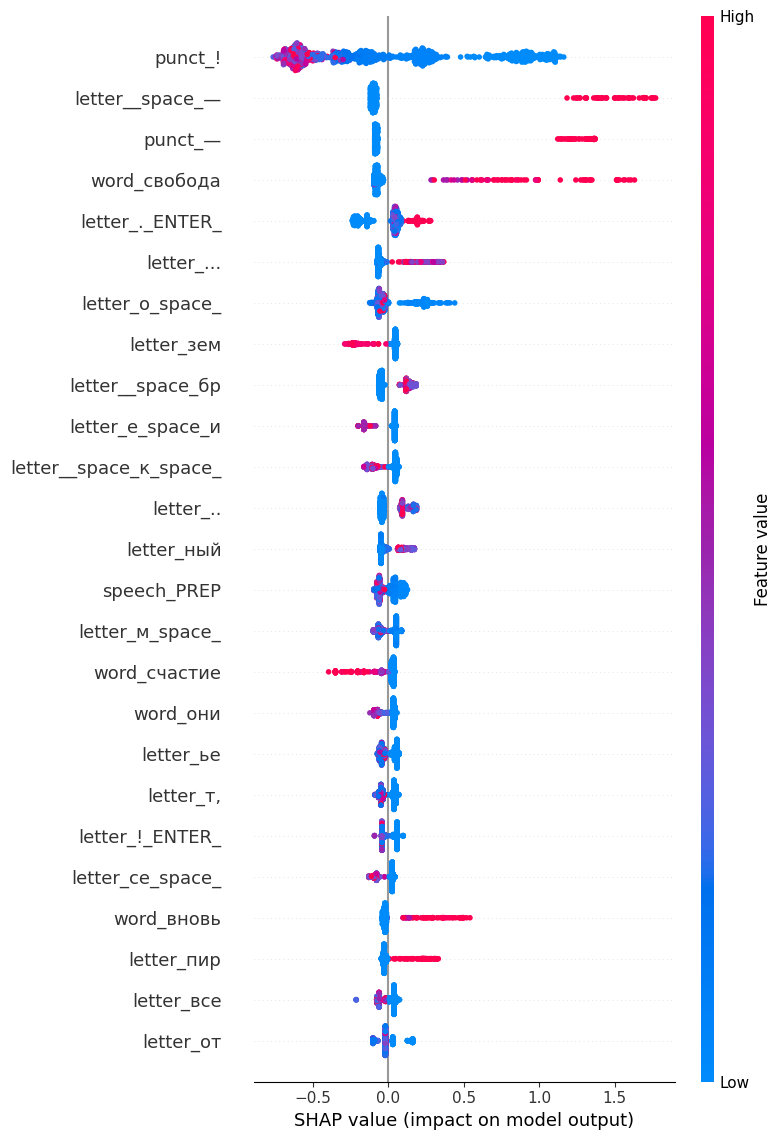

In [ ]:
import matplotlib.pyplot as plt

import shap

best_model = rez_grad.best_estimator_

shap_test = shap.TreeExplainer(best_model).shap_values(result)

fig = shap.summary_plot(shap_test, result, max_display=25, auto_size_plot=True)

In [ ]:
#shap_test = shap.TreeExplainer(mlp_grad).shap_values(result)


explainer = shap.KernelExplainer(mlp_grad.predict, result)
shap_values = explainer.shap_values(result, nsamples = 100)
shap.summary_plot(shap_values, result, feature_names=result.columns)



#explainer = shap.Explainer(mlp_grad.predict_proba, result)
#shap_values = explainer(result, max_evals=2 * result.shape[1] + 1)

#fig = shap.summary_plot(shap_values, result, max_display=25, plot_size=None)

plt.savefig("/content/drive/MyDrive/shap.png"
            , 
            dpi=1000, 
            bbox_inches='tight'
            )

In [ ]:
import matplotlib.pyplot as plt

# Получаем лучшую модель из GridSearchCV
best_model = rez_grad_metrica.best_estimator_

# Получаем веса для каждого признака
# Получаем важности для каждого признака
importances = best_model.feature_importances_
#result = list(filter(lambda x: x >= min_value, lst))

# Сортируем признаки по убыванию важности
sorted_idx = np.argsort(importances)[::-1]

# Строим график важности признаков
plt.figure(figsize=(10, 8))
plt.bar(range(result.shape[1]), importances[sorted_idx])
plt.xticks(range(result.shape[1]), sorted_idx)
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.show()

*стэкинг*

In [ ]:
# Создаем конвейер бета моделей
# уже выяснили какие модели предпочтительней
speech_syntax_metrica, speech_syntax_model = SVC_fit(speech_syntax_ds, y, class_weight=class_weight)
X_lem_tfidf_metrica, X_lem_tfidf_model = MLP_fit(X_lem_tfidf_vectorized, y, class_weight=class_weight)
punct_metrica, punct_model = MLP_fit(df_punct, y, class_weight=class_weight)
result_metrica_2_3, result_model_2_3 = ABC_fit(sym_vec, y)

In [ ]:
import pickle

# Сохраняем модель в файл
with open('/content/drive/MyDrive/speech_syntax_model.pkl', 'wb') as f:
    pickle.dump(speech_syntax_model, f)

with open('/content/drive/MyDrive/X_lem_tfidf_model.pkl', 'wb') as f:
    pickle.dump(X_lem_tfidf_model, f)

with open('/content/drive/MyDrive/punct_model.pkl', 'wb') as f:
    pickle.dump(punct_model, f)

with open('/content/drive/MyDrive/result_model_2_3.pkl', 'wb') as f:
    pickle.dump(result_model_2_3, f)
    

In [ ]:
import pickle

with open('/content/drive/MyDrive/X_lem_tfidf_model.pkl', 'rb') as f:
    X_lem_tfidf_model = pickle.load(f)

with open('/content/drive/MyDrive/punct_model.pkl', 'rb') as f:
    punct_model = pickle.load(f)

with open('/content/drive/MyDrive/result_model_2_3.pkl', 'rb') as f:
    result_model_2_3 = pickle.load(f)
    
with open('/content/drive/MyDrive/speech_syntax_model.pkl', 'rb') as f:
    speech_syntax_model = pickle.load(f)

In [ ]:
# попробуем в тупую объединить и обучить а потом стэкинг 

from sklearn.ensemble import StackingClassifier

# Создаем мета-модель на основе логистической регрессии
meta_model = LogisticRegression()

# Создаем объект StackingClassifier, передавая в него список базовых моделей и мета-модель
stacking_model = StackingClassifier(
    estimators=[('model_1', speech_syntax_model), ('model_2', X_lem_tfidf_model),
                ('model_3', punct_model), ('model_4', result_model_2_3)],
    final_estimator=meta_model
)

X_train, X_test, y_train, y_test = train_test_split(result, y, train_size=0.80, test_size=0.20, random_state=0)


# Обучаем ансамблевую модель на данных
stacking_model.fit(X_train, y_train)

In [ ]:
calc_metrics(stacking_model, X_test, y_test)

In [ ]:
speech_X_train, speech_X_test, speech_y_train, speech_y_test = train_test_split(speech_syntax_ds, y, train_size=0.80, test_size=0.20, random_state=0)
lem_X_train, lem_X_test, lem_y_train, lem_y_test = train_test_split(X_lem_tfidf_vectorized, y, train_size=0.80, test_size=0.20, random_state=0)
punct_X_train, punct_X_test, punct_y_train, punct_y_test = train_test_split(df_punct, y, train_size=0.80, test_size=0.20, random_state=0)
sym_X_train, sym_X_test, sym_y_train, sym_y_test = train_test_split(sym_vec, y, train_size=0.80, test_size=0.20, random_state=0)
result_X_train, result_X_test, result_y_train, result_y_test = train_test_split(result, y, train_size=0.80, test_size=0.20, random_state=0)

final_ds = pd.DataFrame({
                         'speech_syntax_model': speech_syntax_model.predict(speech_syntax_ds), 
                         'X_lem_tfidf_model': X_lem_tfidf_model.predict(X_lem_tfidf_vectorized), 
                         'punct_model': punct_model.predict(df_punct), 
                         "result_model_2_3": result_model_2_3.predict(sym_vec)
                         })

final_ds

,X_lem_tfidf_model,punct_model,result_model_2_3
0,1,0,1
1,1,0,1
2,1,0,0
3,1,1,1
4,1,0,1
...,...,...,...
1013,0,0,0
1014,0,0,0
1015,0,0,0
1016,0,0,0


In [ ]:
super_metrica, super_models = feature_pipeline(final_ds, y, class_weight=class_weight)

In [ ]:
# run this cell to clear all data without restarting a kernel

%reset

for name in dir():
    if not name.startswith('_'):
        del globals()[name]

# Garbage Collector - use it like gc.collect()
import gc

# Custom Callback To Include in Callbacks List At Training Time
class GarbageCollectorCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()

# end